   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Model training complete.
Accuracy: 98.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       1

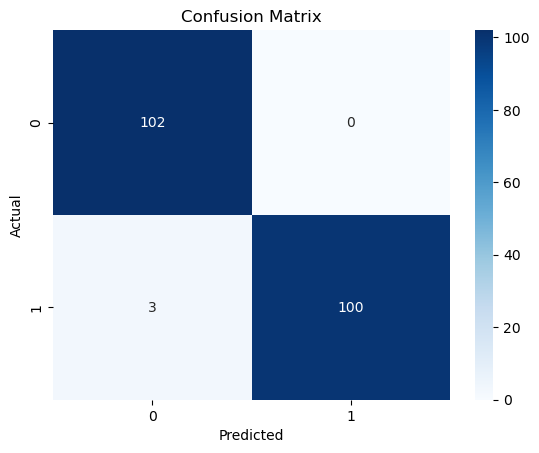

Model saved successfully as 'disease_prediction_model.pkl'.


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load dataset from local file
data = pd.read_csv('heart_disease.csv')

# Display first 5 rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop missing values if any
data.dropna(inplace=True)

# Convert categorical columns using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target (0 = No Disease, 1 = Disease)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to training data
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the trained model as a .pkl file
joblib.dump(model, "disease_prediction_model.pkl")
print("Model saved successfully as 'disease_prediction_model.pkl'.")



In [7]:
loaded_model = joblib.load("disease_prediction_model.pkl")
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print(f"Prediction for sample data: {'Disease' if prediction[0] == 1 else 'No Disease'}")

Prediction for sample data: Disease


C:\Users\BIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
